# TP 5.2 : Étude de cas en imagerie

L'objectif de ce TP est de mettre en oeuvre des méthodes de statistique exploratoire sur un type particulier de données : une image.

## 1. Les données

Les images proposées dans le dossier `data/images` sont au format PNM et de de taille $512 \times 512$. Pour commencer, vous devez choisir une image et la charger à l'aide de la fonction `read.pnm()` du package `pixmap` (les erreurs peuvent être ignorées).

In [4]:
# install.packages('pixmap')

In [5]:
library(pixmap)

mon_image_fichier <- "data/images/Yacht_512.pnm"
mon_image <- read.pnm(mon_image_fichier)

L'image peut être affichée grâce à la fonction `plot()`.

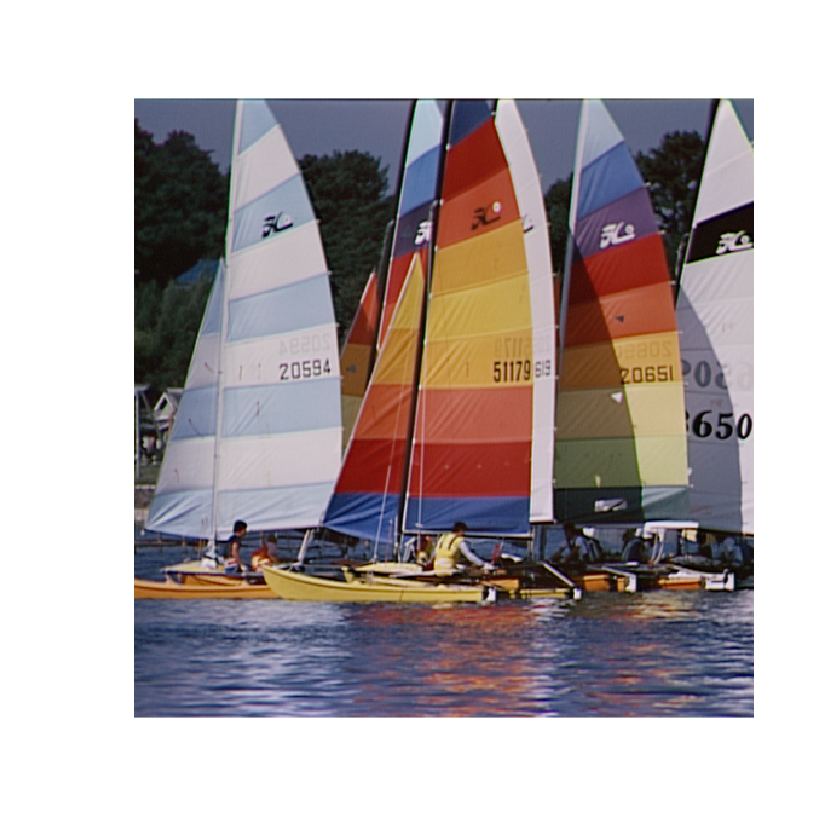

In [6]:
plot(mon_image)

L'objet `mon_image` est de classe `pixmapRGB` qui suit le formalisme objet S4. Ce détail technique est sans grande importance si ce n'est que l'accès aux composants de `mon_image` est différent du formalisme S3 habituel. Ainsi, nous pouvons lister les composants de l'objet avec la commande `slotNames()` au lieu de `names()` et accéder à ces composants avec l'opérateur `@` au lieu de `$`.

In [7]:
# Classe de l'objet
class(mon_image)

[1] "pixmapRGB"
attr(,"package")
[1] "pixmap"

In [8]:
# Liste des composants
slotNames(mon_image)

[1] "red"      "green"    "blue"     "channels" "size"     "cellres"  "bbox"    
[8] "bbcent"

In [9]:
# Accès aux composants
mon_image@size

[1] 512 512

## 2. Analyse 1D

Les analyses unidimensionnelle vont porter sur les valeurs de l'ensemble des  pixels de l'image dans chaque canal (*channel*). Nous pouvons par exemple travailler sur le canal rouge à partir de l'objet `mon_image_rouge` défini comme ci-dessous ainsi que sur les canaux vert et bleu.

In [10]:
mon_image_rouge <- as.vector(mon_image@red)
mon_image_vert <- as.vector(mon_image@green)
mon_image_bleu <- as.vector(mon_image@blue)

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Calculer quelques statistiques élémentaires sur chaque canal de l'image initial à l'aide de <code>summary()</code>.</li>
        <li>Représenter en parallèle les 3 boxplots correspondant aux canaux de l'image.</li>
        <li>Représenter les histogrammes avec <code>hist()</code> accompagnés d'une courbe de densité estimée par la fonction <code>density()</code>.<br>
            <center><img src="img/image_rgb.png"></center>
        </li>
    </ol>
</div>

In [13]:
# QUESTION 2.1
print("Canal rouge")
summary(mon_image_rouge)

print("Canal vert")
summary(mon_image_vert)

print("Canal bleu")
summary(mon_image_bleu)

[1] "Canal rouge"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2824  0.4471  0.4610  0.6745  0.9294 

[1] "Canal vert"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2314  0.3725  0.4002  0.6000  0.8980 

[1] "Canal bleu"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2039  0.4078  0.4083  0.5922  0.9647 

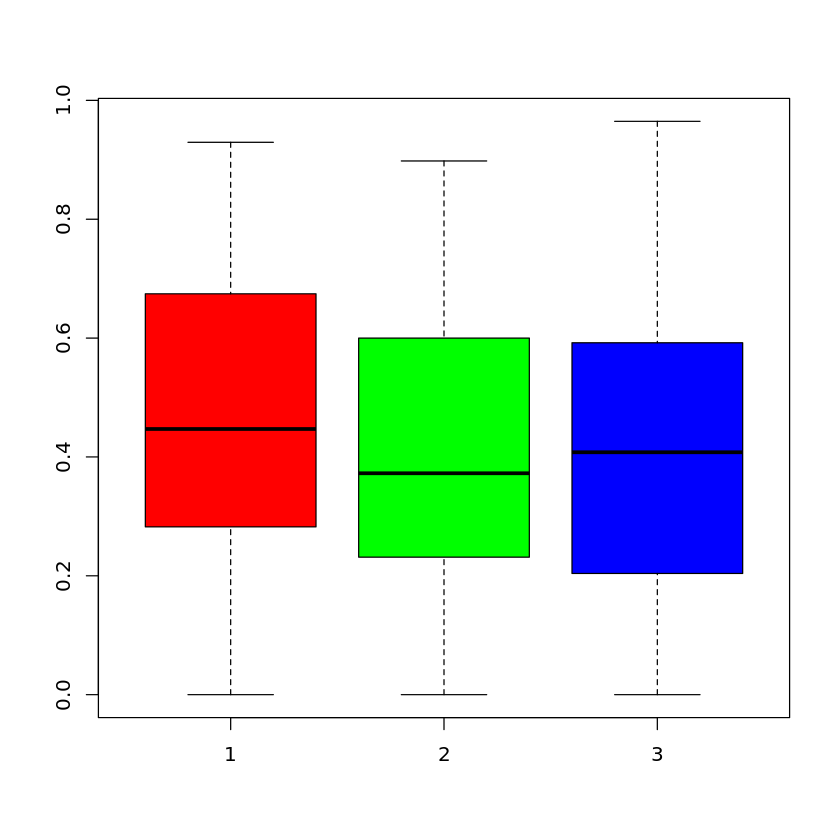

In [32]:
# QUESTION 2.2

boxplot(mon_image_rouge, mon_image_vert, mon_image_bleu, col=c('red', 'green','blue'))

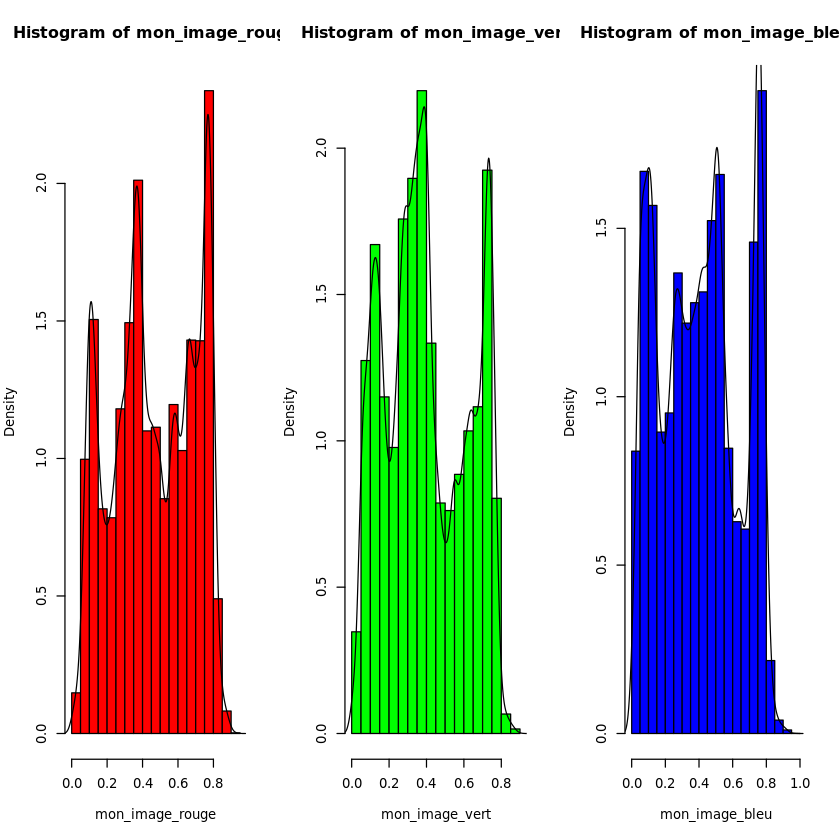

In [46]:
# QUESTION 2.3
par(mfrow=c(1,3))
hist(mon_image_rouge, col='red', prob=TRUE)
lines(density(mon_image_rouge))
hist(mon_image_vert, col='green', prob=TRUE)
lines(density(mon_image_vert))
hist(mon_image_bleu, col='blue', prob=TRUE)
lines(density(mon_image_bleu))

## 3. Analyse 2D

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Représenter les nuages de points croisant les canaux deux à deux. Utiliser l'option <code>pch="."</code> de la fonction <code>plot()</code> pour alléger les graphiques.</li>
        <li>Calculer la matrice des corrélations linéaire de Pearson entre chaque canaux.</li>
    </ol>
    <center><img src="img/image_2d.png"></center>
</div>

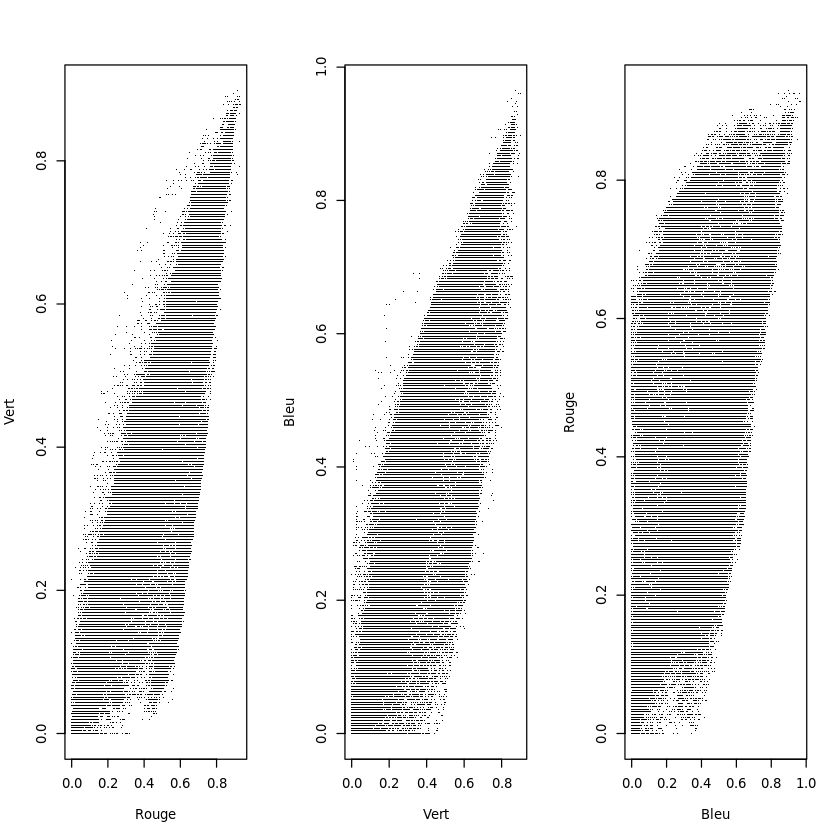

In [51]:
# QUESTION 3.1
par(mfrow=c(1,3))
plot(x = mon_image_rouge, y=mon_image_vert, pch = '.', xlab = 'Rouge', ylab = 'Vert')
plot(x = mon_image_vert, y=mon_image_bleu, pch = '.', xlab = 'Vert', ylab = 'Bleu')
plot(x = mon_image_bleu, y=mon_image_rouge, pch = '.', xlab = 'Bleu', ylab = 'Rouge')

In [69]:
# QUESTION 3.2
df_canaux <- data.frame(
  Rouge = mon_image_rouge,
  Vert  = mon_image_vert,
  Bleu  = mon_image_bleu
)
head(df_canaux)

cor(x = df_canaux,
    y = df_canaux,
    method='pearson')

,Rouge,Vert,Bleu
,<dbl>,<dbl>,<dbl>
1,0.3019608,0.4000000,0.4745098
2,0.3529412,0.4117647,0.4980392
3,0.3254902,0.3843137,0.4941176
4,0.3254902,0.3843137,0.4980392
5,0.3411765,0.3725490,0.4901961
6,0.3411765,0.3882353,0.4823529


,Rouge,Vert,Bleu
Rouge,1.0000000,0.8514904,0.6058479
Vert,0.8514904,1.0000000,0.8703850
Bleu,0.6058479,0.8703850,1.0000000


## 4. Analyse multidimensionnelle

Dans cette section, nous supposons que les données sont stockées dans un `data.frame` à 3 colonnes (une colonne par canal) et n lignes (une ligne par pixel de l'image, soit 262144 pour une image de taille $512 \times 512$).

In [73]:
df_image <- data.frame(
    rouge = mon_image_rouge,
    vert  = mon_image_vert,
    bleu  = mon_image_bleu
)

cat("Dimensions du data frame :", dim(df_image))

Dimensions du data frame : 262144 3

### 4.1 Classification

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Procéder à une classification des pixels avec <code>kmeans()</code> à 2, 4 et 8 groupes et stocker les résultats dans <code>kmeans_image_2</code>, <code>kmeans_image_4</code> et <code>kmeans_image_8</code>, respectivement.</li>
        <li>Utiliser la fonction <code>pixmapGrey()</code> avec l'option <code>nrow=512</code> pour convertir les résultats de chaque classification en une image de niveaux de gris.</li>
        <li>Utiliser <code>plot()</code> pour visualiser ces images.</li>
        <li>Commenter la mise en oeuvre d'une méthode de classification sur une image. Comment pourrait-on définir un nombre de groupes raisonnable avant de procéder à un algorithme K-means comme décrit précédemment ?</li>
    </ol>
    <center><img src="img/image_cluster.png"></center>
</div>

In [74]:
# QUESTION 4.1.1
kmeans_image_2 <- kmeans(df_image, centers=2)
kmeans_image_4 <- kmeans(df_image, centers=4)
kmeans_image_8 <- kmeans(df_image, centers=8)

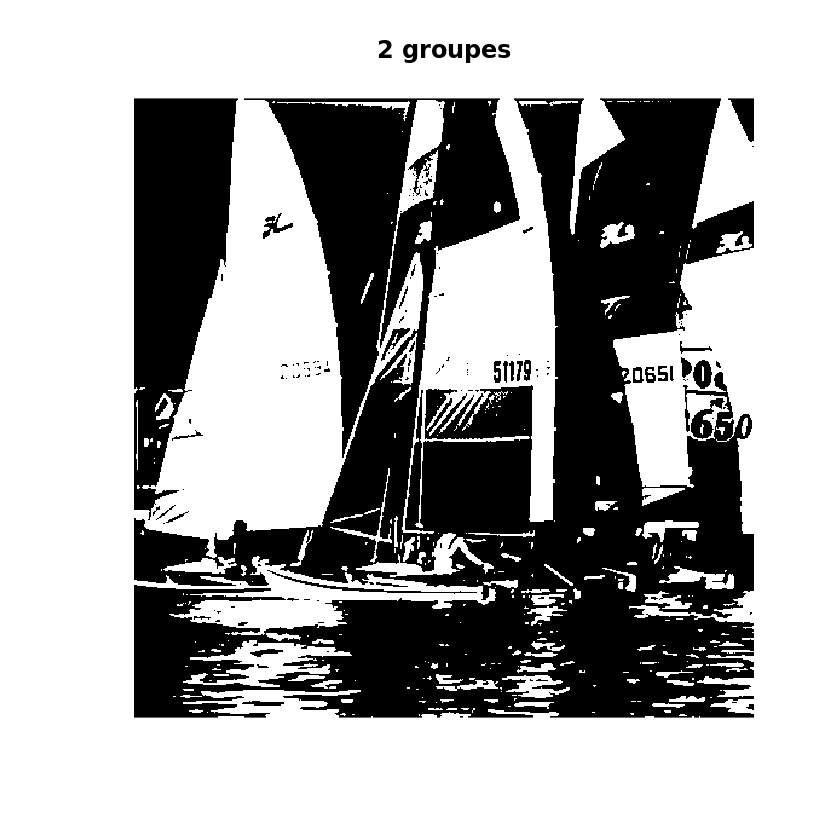

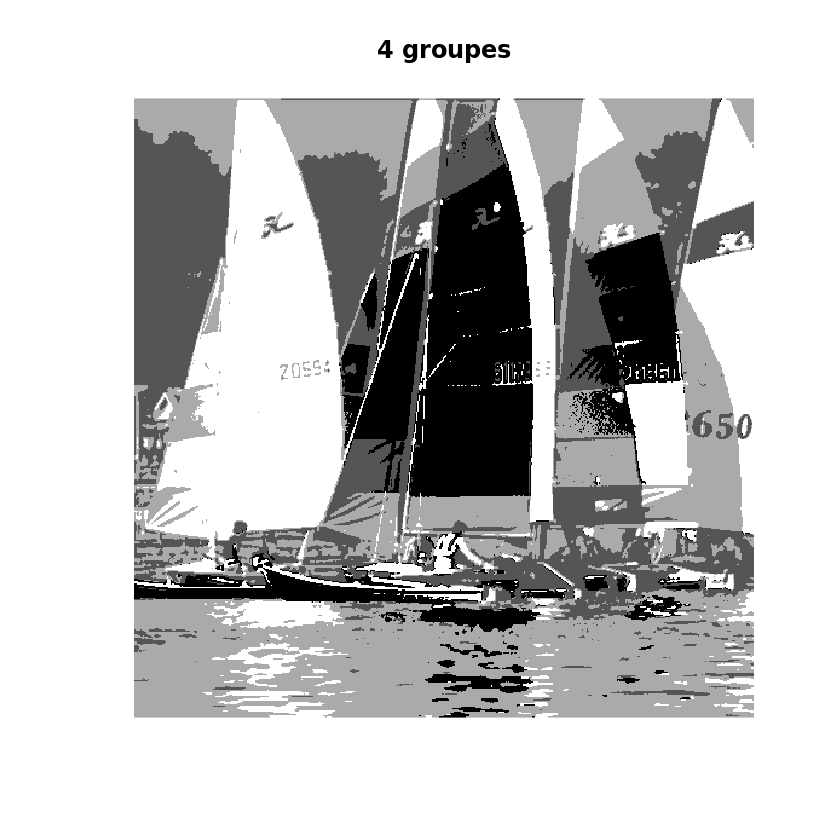

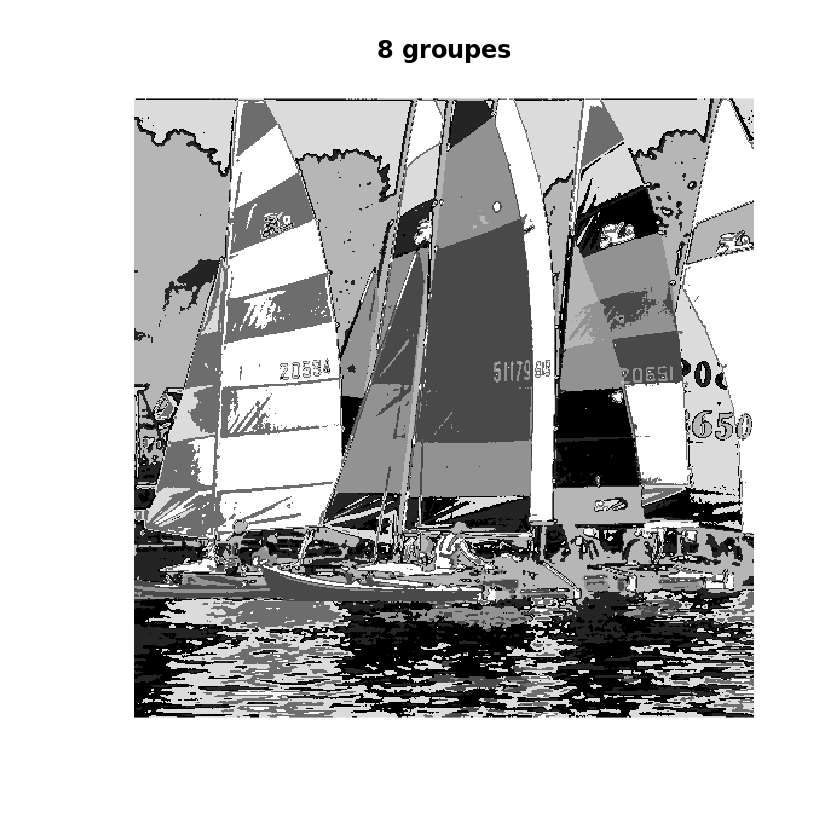

In [84]:
# QUESTION 4.1.2 & 4.1.3
plot(pixmapGrey(kmeans_image_2$cluster, nrow=512), main='2 groupes')
plot(pixmapGrey(kmeans_image_4$cluster, nrow=512), main='4 groupes')
plot(pixmapGrey(kmeans_image_8$cluster, nrow=512), main='8 groupes')

In [85]:
# QUESTION 4.1.4
print("On pourrait faire une classification ascendante hiérarchique pour évaluer le nombre de clusters pertinent.")

[1] "On pourrait faire une classification ascendante hiérarchique pour évaluer le nombre de clusters pertinent."


### 4.2 Analyse en composantes principales

<div class="alert alert-block alert-success">
    Utilisez la cellule suivante pour répondre aux questions :
    <ol>
        <li>Effectuer une ACP en utilisant la fonction <code>PCA()</code> de <code>FactoMineR</code> sans réduire les données (option <code>scale.unit=FALSE</code>).</li>
        <li>Expliquer pourquoi les données ne doivent pas être réduites.</li>
        <li>Le package <code>FactoMineR</code> dispose d'une fonction de reconstruction des données à partir des résultats d'une ACP. Par exemple, pour reconstruire l'image à partir de la première composante principale seulement, nous utiliserons l'option <code>ncp=1</code> de la fonction <code>reconst()</code>. Voici un exemple de code que vous pouvez reprendre pour repasser du format vectoriel à une matrice d'image en limitant les valeurs au segment $[0,1]$ grâce aux fonctions <code>pmin()</code> et <code>pmax()</code>.</li>
    </ol>
</div>

In [88]:
install.packages("FactoMineR")

Installing package into ‘/home/anais/R/x86_64-pc-linux-gnu-library/4.5’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘later’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘promises’, ‘estimability’, ‘mvtnorm’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’


Warning message in install.packages("FactoMineR"):
“installation of package ‘SparseM’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘minqa’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘nloptr’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘RcppEigen’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘mvtnorm’ had non-zero exit status”
Warning message in install.packages("FactoMineR"):
“installation of package ‘flashClust’ had non-zero exit status”
Warning mess

In [89]:
# QUESTION 4.2.1
library(FactoMineR)
apc_image <- PCA(df_image, scale.unit=FALSE)

ERROR: Error in library(FactoMineR): there is no package called ‘FactoMineR’


In [ ]:
# QUESTION 4.2.2
print("Les données ne doivent pas être réduites car elles forment un ensemble {rouge, vert, bleu} et réduire les composantes risque de déformer l'information contenue par le tuple (on corrigerait une des composantes différement des autres)")
print("De plus, les données ont déjà la même échelle 50-255)")

In [ ]:
# QUESTION 4.2.3
# Reconstruction à partir de la première composante principale
reconst_cp1 <- reconst(acp_image, ncp=1)

# Copie de l'image initiale
mon_image_cp1 <- mon_image

# Remplacement des canaux par la reconstruction
mon_image_cp1@red <- matrix(pmax(pmin(reconst_cp1[,1], 1), 0), 512, 512)
mon_image_cp1@green <- matrix(pmax(pmin(reconst_cp1[,2], 1), 0), 512, 512)
mon_image_cp1@blue <- matrix(pmax(pmin(reconst_cp1[,3], 1), 0), 512, 512)

# Affichage de l'image reconstruite
plot(mon_image_cp1)

ERROR: Error in reconst(acp_image, ncp = 1): could not find function "reconst"


<div class="alert alert-block alert-success">
    <ol start="4">
        <li>Utiliser le code ci-dessus pour reconstruire l'image à partir de 1, 2 et 3 composantes principales. Comparer les résultats à l'image initiale.</li>
        <li>Commenter les différentes manipulations réalisées autour de l'ACP. En quoi les résultats de la reconstruction illustrent-ils le principe de l'ACP ?</li>
    </ol>
</div>

In [ ]:
# À FAIRE